COPYRIGHT © 2018 Kiran Arun <kironni@gmail.com>

### Setup

In [1]:
# install dependencies
!rm -r Neural_Networks-101-challenge/
!git clone -b improvements https://github.com/KiranArun/Neural_Networks-101-challenge.git
!python3 /content/Neural_Networks-101-challenge/scripts/setup.py

rm: cannot remove 'Neural_Networks-101-challenge/': No such file or directory
Cloning into 'Neural_Networks-101-challenge'...
remote: Counting objects: 61, done.
remote: Total 61 (delta 0), reused 0 (delta 0), pack-reused 61
Unpacking objects: 100% (61/61), done.
--2018-07-07 16:08:44--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.46.196.215, 2600:1402:2000:193::e59, 2600:1402:2000:1bb::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.46.196.215|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/content/cats_vs_dogs_data/kagglecatsanddogs_3367a.zip’

atsanddogs_3367a.zi  98%[==================> ] 777.93M  35.7MB/s    eta 1s     

kagglecatsanddogs_3 100%[===================>] 786.68M  35.9MB/s    in 23s     

2018-07-07 16:09:07 (34.3 MB/s) - ‘/content/cats_vs_dogs_data/kagglecatsanddogs_3367a.zip’ saved [824894548/824894548]



In [2]:
# run tensorboard
get_ipython().system_raw('tensorboard --logdir=/content/logdir/ --host=0.0.0.0 --port=6006 &')
get_ipython().system_raw('/content/ngrok http 6006 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c "import sys, json; print('Tensorboard Link:', json.load(sys.stdin)['tunnels'][0]['public_url'])"

Tensorboard Link: http://f0a3a5d5.ngrok.io


# Neural Networks Challenge

You will create and train a neural net to classify pictures of dogs and cats.

You can only change the hyperparameters and network, I suggest researching image recognition.

In [3]:
# importing libraries
import keras
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import files

from keras.preprocessing.image import ImageDataGenerator
import keras.layers as layers
import keras.activations as activations

Using TensorFlow backend.


### Tuning Hyperparameters

In [0]:
# hyperparams

# input image dimensions
image_dims = (150,150)

# number of images to input each step
batch_size = 100

# number of times to go through the whole dataset
epochs = 2

# learning rate
learning_rate = 0.01

### Setting up data generators and call backs

In [0]:
# DO NOT EDIT

# set tensorboard to log each epoch and model graph
model_logdir = '/content/logdir/'

hparam_str = ',lr_%f' % (learning_rate)
previous_runs = list(f for f in os.listdir(model_logdir) if f.startswith('run'))

if len(previous_runs) == 0:
    run_number = 1  
else:
    run_number = max([int(s[4:6]) for s in previous_runs]) + 1

LOGDIR = '%srun_%02d' % (model_logdir, run_number)+hparam_str+'/'

tensorboard = keras.callbacks.TensorBoard(log_dir=LOGDIR)

In [0]:
# DO NOT EDIT

# save model after each epoch
# this is so you can choose which weights you want
checkpoint = keras.callbacks.ModelCheckpoint(filepath=LOGDIR+'model.{epoch:02d}-{val_acc:.2f}.hdf5',
                                             monitor='val_acc',
                                             verbose=1)

In [7]:
# DO NOT EDIT

# create data generator (it will create the data from the images on the fly)
data_dir = '/content/cats_vs_dogs_data/'

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
        data_dir+'train/',
        target_size=image_dims,
        batch_size=batch_size,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        data_dir+'validation/',
        target_size=image_dims,
        batch_size=batch_size,
        class_mode='binary')

Found 20554 images belonging to 2 classes.
Found 2222 images belonging to 2 classes.


### Creating the Neural Net

In [0]:
# DO NOT EDIT

# reset session, create new graph
keras.backend.clear_session()

# initialize model
model = keras.models.Sequential()

The following resources will show you how to implement things, not what to implement.

see [keras core layers](https://keras.io/layers/core/)

see [keras convolutional 2d layer](https://keras.io/layers/convolutional/#conv2d)

see [keras max pooling 2d layer](https://keras.io/layers/pooling/#maxpooling2d)

see [keras activation functions](https://keras.io/activations/)

In [0]:
# add layer(s)

model.add(layers.Conv2D(filters=32,
                        kernel_size=5,
                        strides=5,
                        padding="same",
                        activation='relu',
                        input_shape=image_dims+(3,)))

model.add(layers.MaxPool2D(pool_size=3,
                           strides=3,
                           padding="same"))


model.add(layers.Flatten())

# the last layer needs to output 1 unit, and have sigmoid activation
model.add(layers.Dense(units=1,
                       activation='sigmoid'))

In [10]:
# DO NOT EDIT

# show model summmary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3201      
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________


### Choosing optimzer

see https://keras.io/optimizers/

In [0]:
# optimizer
optimizer = keras.optimizers.SGD(lr=learning_rate)

### Compiling model

In [0]:
# DO NOT EDIT

model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

### Training model

In [13]:
# DO NOT EDIT

history = model.fit_generator(generator=train_generator,
                              epochs=epochs,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks=[tensorboard,checkpoint])

Epoch 1/2
206/206 [==============================] - 72s 348ms/step - loss: 0.6862 - acc: 0.5520 - val_loss: 0.6836 - val_acc: 0.5576

Epoch 00001: saving model to /content/logdir/run_01,lr_0.010000/model.01-0.56.hdf5
Epoch 2/2
206/206 [==============================] - 68s 328ms/step - loss: 0.6760 - acc: 0.5872 - val_loss: 0.6710 - val_acc: 0.6031

Epoch 00002: saving model to /content/logdir/run_01,lr_0.010000/model.02-0.60.hdf5


In [14]:
# DO NOT EDIT

score = model.evaluate_generator(generator=validation_generator)
print('Validation accuracy:', str(round(100*score[1],2))+'%')

Validation accuracy: 60.31%


### Results

Below will be a list of models (from after each epoch).

It will download the highest performming one to your local machine.

In [15]:
# DO NOT EDIT

# show path to model files with performance

checkpoints = [f for f in os.listdir(LOGDIR) if f.startswith('model')]

for model_file in checkpoints:
  print("'"+LOGDIR+model_file+"'",'with',str(model_file[-7:-5])+'% accuracy')
  
model_to_save = LOGDIR+checkpoints[np.argmax(np.array([int(f[-7:-5]) for f in checkpoints]))]
  
# if you want to choose a different model, replace model_to_save with a string of the path to the file
files.download(filename=model_to_save)

'/content/logdir/run_01,lr_0.010000/model.01-0.56.hdf5' with 56% accuracy
'/content/logdir/run_01,lr_0.010000/model.02-0.60.hdf5' with 60% accuracy


### Example predictions

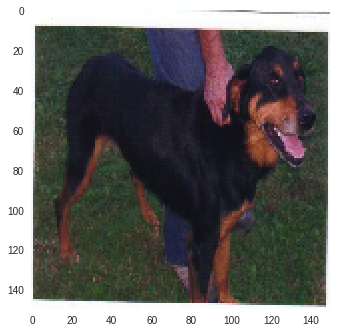

dog: 50.75%


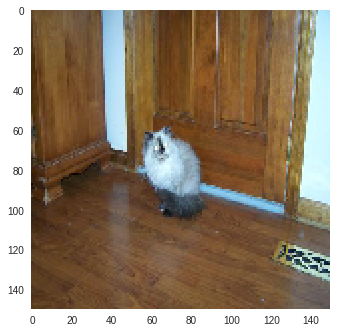

dog: 51.89%


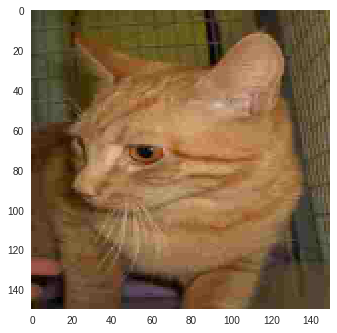

dog: 53.76%


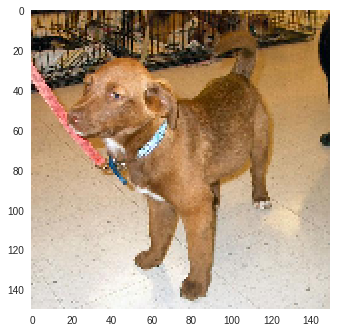

cat: 53.29%


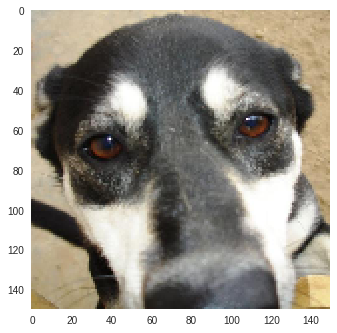

dog: 51.83%


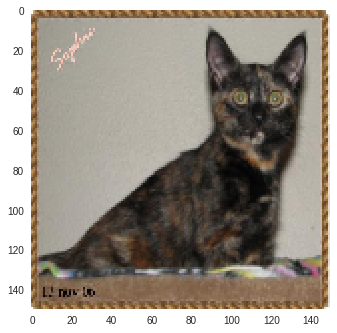

dog: 56.1%


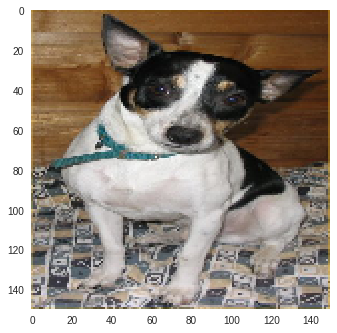

cat: 52.04%


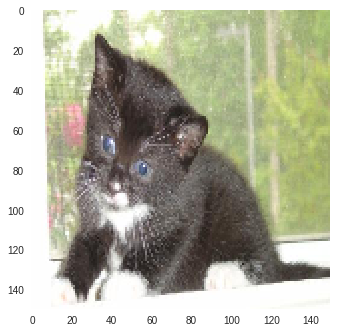

dog: 53.32%


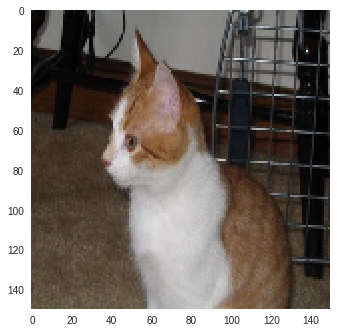

cat: 54.88%


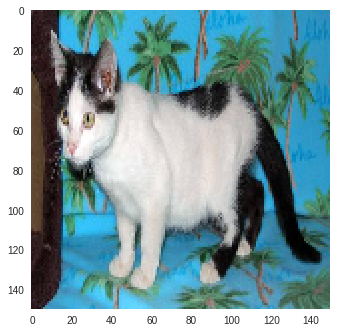

dog: 54.13%


In [16]:
samples = validation_generator.next()
ims,labs = samples[0][:10],samples[1][:10]

for i,im in enumerate(ims):
    plt.imshow(im)
    plt.grid(False)
    plt.show()
    prob = model.predict(np.expand_dims(im,axis=0))
    if prob > 0.5:
        print('dog: '+str(round(float(100*prob),2))+'%')
    else:
        print('cat: '+str(round(float(100*(1-prob)),2))+'%')